In [4]:
%pip install openpyxl
%pip install seaborn
%pip install imbalanced-learn
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Afra\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Afra\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Afra\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Afra\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as Xgb
from sklearn import svm
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
from scipy.stats import ttest_ind, mannwhitneyu, chi2_contingency

In [6]:
df = pd.read_csv('mammo_combined_2018_2022.csv')

print(df.shape)
print(df['MAMMOG_M18'].value_counts())


C:\Users\Afra\AppData\Local\Temp\ipykernel_21716\412131342.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('mammo_combined_2018_2022.csv')


(255334, 205)
MAMMOG_M18
2    246698
1      8636
Name: count, dtype: int64


In [21]:
# guide
# TOTSLF = total self-reported expenditures
# TOTEXP = total expenditures
# INSAT = insurance status ==> 1 = yes , 2 = no , -1 = inaplicable
# POVCAT = income ==> 1 = poor , 2 = near poor , 3 = low income , 4 = middle income , 5 = high income
# SEX ==> 1 = male , 2 = female
# AGE


\==================================================\
Shape of df before filtering for Females: (255334, 205)
Shape of df after filtering for Females (df_females_only): (152363, 205)
\==================================================\
Missing values in each column of df_eda:
AGE           0
INSAT         0
POVCAT        0
TOTSLF        0
TOTEXP        0
MAMMOG_M18    0
dtype: int64
\==================================================\


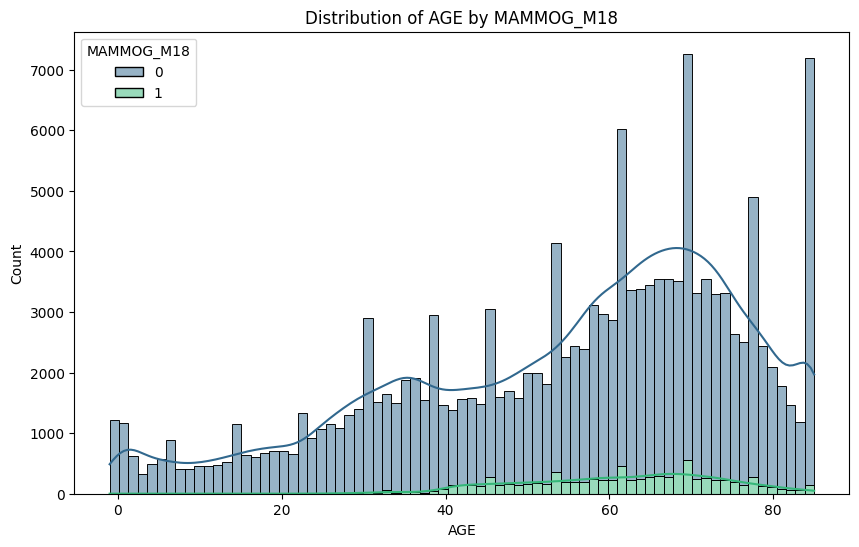

\==================================================\


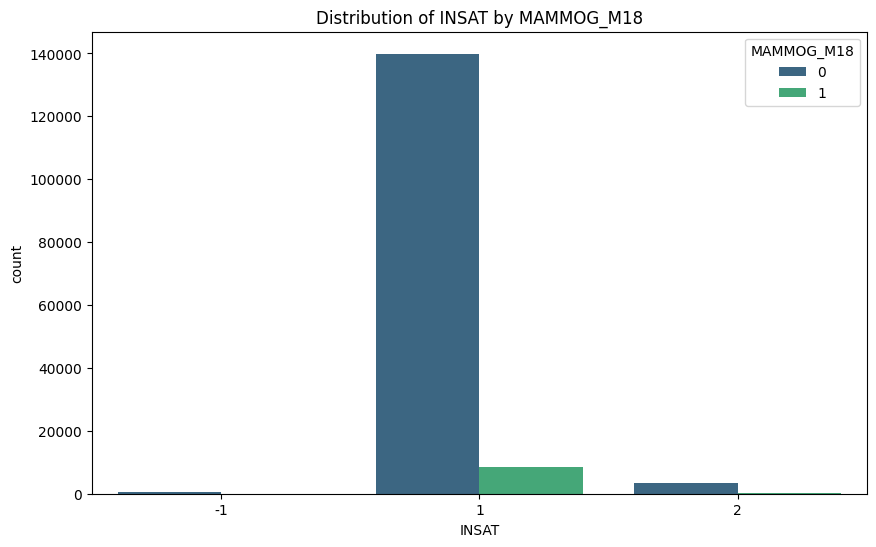

\==================================================\


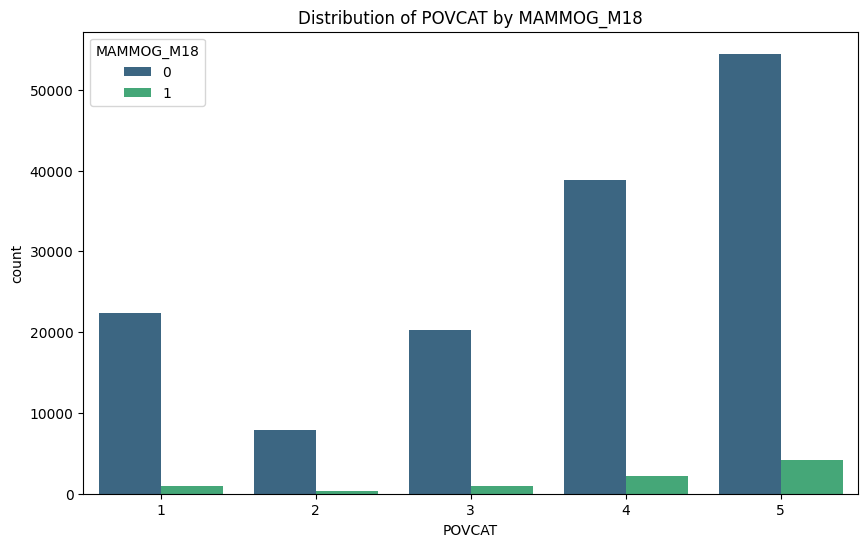

\==================================================\


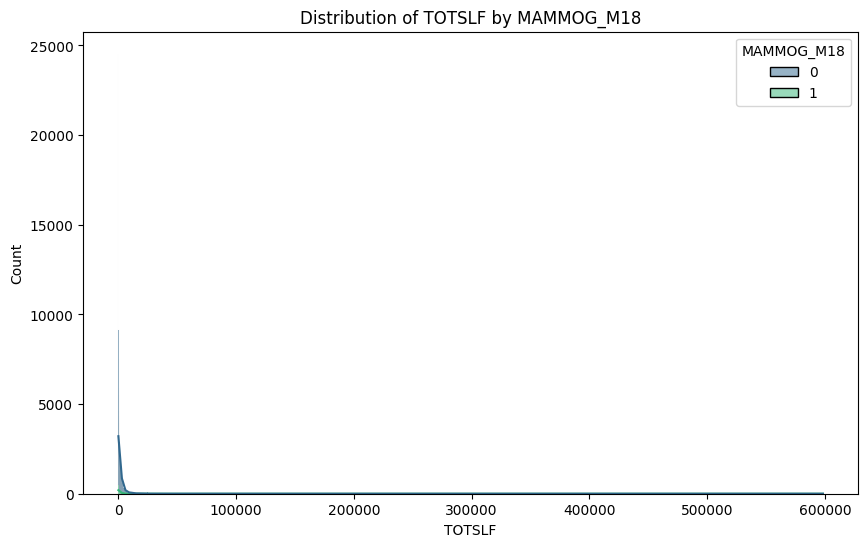

\==================================================\


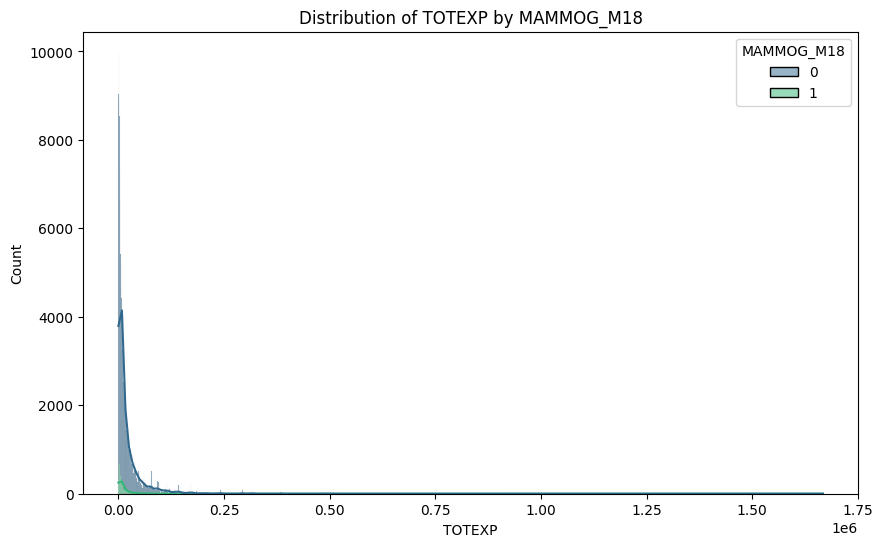

\==================================================\


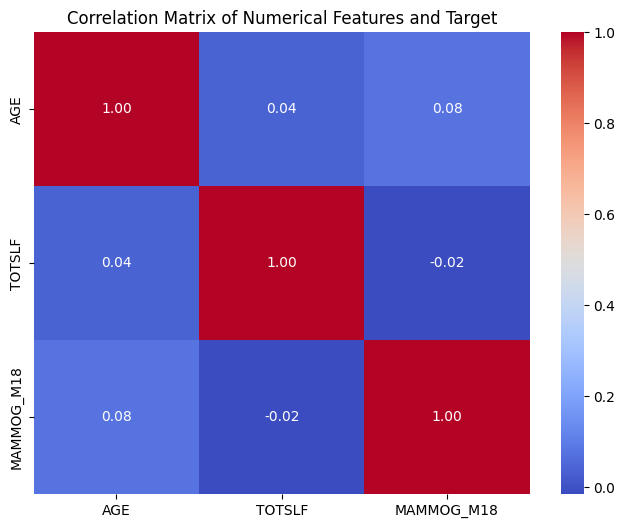

\n==================================================\n
Descriptive statistics for TOTEXP before transformation:
count    1.523630e+05
mean     2.175714e+04
std      4.242264e+04
min      0.000000e+00
25%      3.223000e+03
50%      8.890000e+03
75%      2.370600e+04
max      1.667510e+06
Name: TOTEXP, dtype: float64
\==================================================\


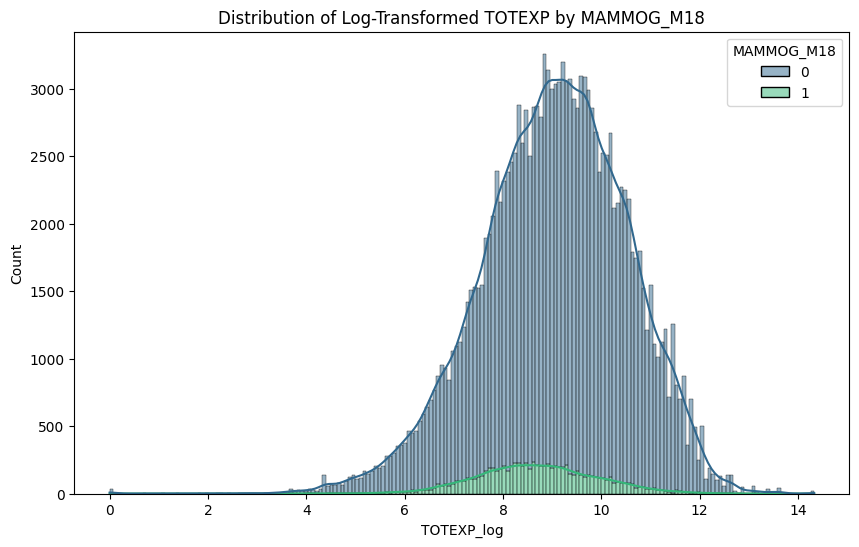

\==================================================\


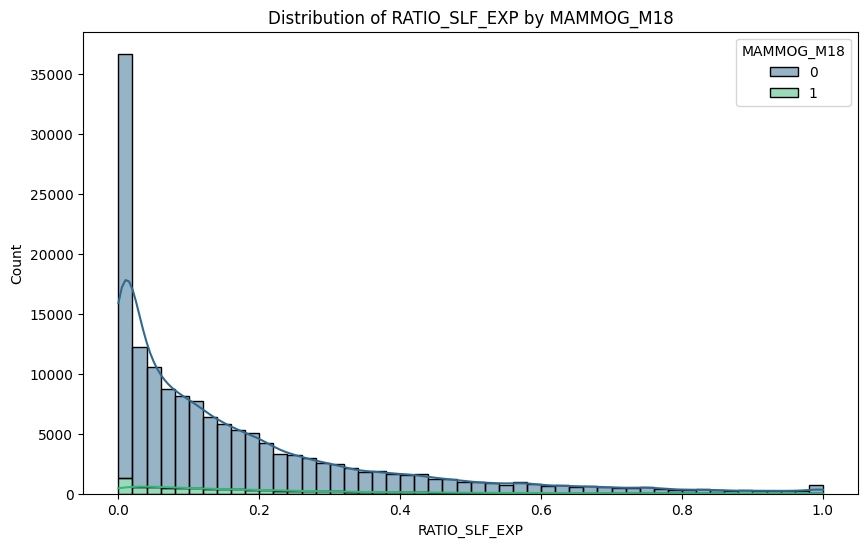

\==================================================\


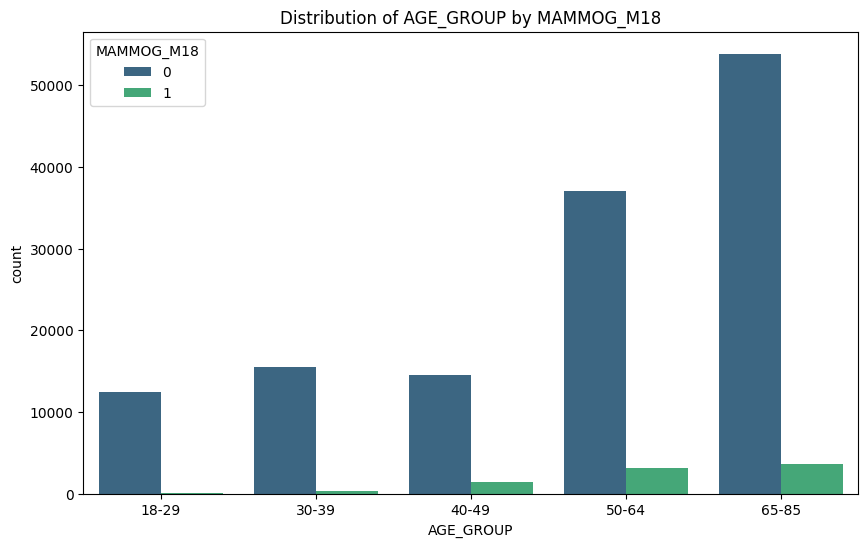

\==================================================\


C:\Users\Afra\AppData\Local\Temp\ipykernel_21716\2385064480.py:97: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df_corr[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df_corr[col]):


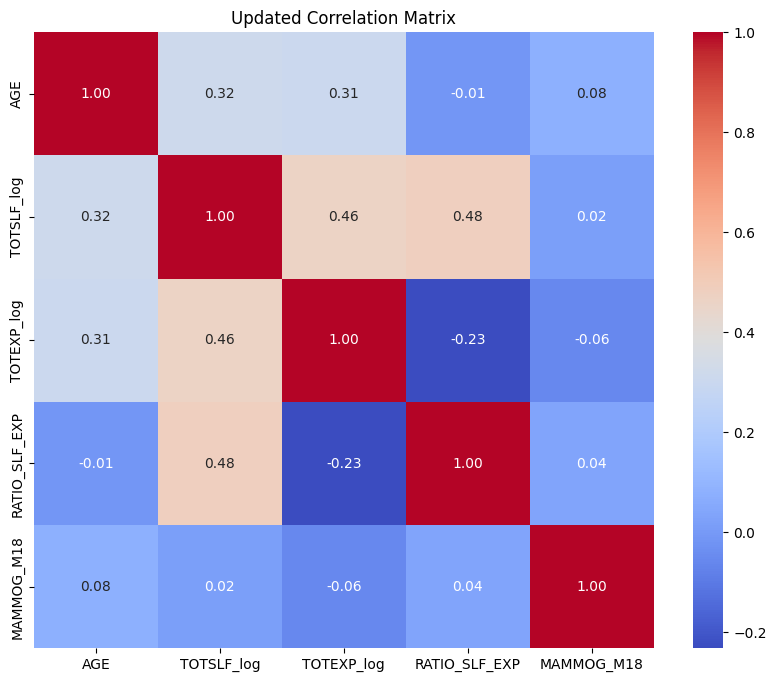

In [ ]:
# EDA

# Filter to Females
print("\\" + "="*50 + "\\")
print(f"Shape of df before filtering for Females: {df.shape}")

df_females_only = df[df['SEX'].map({'Male': 1, 'Female': 2}) == 2].copy() if df['SEX'].dtype == object else df[df['SEX'] == 2].copy()
print(f"Shape of df after filtering for Females (df_females_only): {df_females_only.shape}")
print("\\" + "="*50 + "\\")


df_eda = df_females_only[['AGE', 'INSAT', 'POVCAT', 'TOTSLF', 'TOTEXP', 'MAMMOG_M18']].copy()
 
df_eda['MAMMOG_M18'] = df_eda['MAMMOG_M18'].map({1: 1, 2: 0})

# NaN values in the selected columns
print("Missing values in each column of df_eda:")
print(df_eda.isnull().sum())
print("\\" + "="*50 + "\\")      # We dont have any missing values in the selected columns


# Plotting distributions of features
features_to_plot = ['AGE', 'INSAT', 'POVCAT', 'TOTSLF', 'TOTEXP']
target_variable = 'MAMMOG_M18'

for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    if df_eda[feature].dtype == 'object' or df_eda[feature].nunique() < 10:
        sns.countplot(x=feature, hue=target_variable, data=df_eda, palette='viridis')
        plt.title(f'Distribution of {feature} by {target_variable}')
    else:
        sns.histplot(data=df_eda, x=feature, hue=target_variable, kde=True, multiple="stack", palette='viridis')
        plt.title(f'Distribution of {feature} by {target_variable}')
    plt.show()
    print("\\" + "="*50 + "\\")

# Plotting the correlation matrix
numerical_features_eda = ['AGE', 'TOTSLF']
plt.figure(figsize=(8, 6))
sns.heatmap(df_eda[numerical_features_eda + [target_variable]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Target')
plt.show()

# >>>>>>>>>>>>>>>>>>>> Feature Engineering <<<<<<<<<<<<<<<<<<<<

if 'TOTEXP' in df_eda.columns:
    print("\\" + "="*50 + "\\")
    print("Descriptive statistics for TOTEXP before transformation:")
    print(df_eda['TOTEXP'].describe())
    print("\\" + "="*50 + "\\")

    # Log transformation of TOTEXP
    df_eda['TOTEXP_log'] = np.log1p(df_eda['TOTEXP'])

    # Plotting the distribution of log-transformed TOTEXP
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_eda, x='TOTEXP_log', hue=target_variable, kde=True, multiple="stack", palette='viridis')
    plt.title(f'Distribution of Log-Transformed TOTEXP by {target_variable}')
    plt.show()
    print("\\" + "="*50 + "\\")

    # Creating a new feature RATIO_SLF_EXP
    df_eda['RATIO_SLF_EXP'] = df_eda['TOTSLF'] / (df_eda['TOTEXP'] + 1e-6)

    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_eda, x='RATIO_SLF_EXP', hue=target_variable, kde=True, multiple="stack", palette='viridis', bins=50)
    plt.title(f'Distribution of RATIO_SLF_EXP by {target_variable}')
    plt.show()
    print("\\" + "="*50 + "\\")
else:
    print("Column 'TOTEXP' not found in df_eda.")


# Creating age groups
bins = [18, 30, 40, 50, 65, 85]
labels = ['18-29', '30-39', '40-49', '50-64', '65-85']
df_eda['AGE_GROUP'] = pd.cut(df_eda['AGE'], bins=bins, labels=labels, right=True, include_lowest=True)

plt.figure(figsize=(10, 6))
sns.countplot(x='AGE_GROUP', hue=target_variable, data=df_eda, palette='viridis', order=labels)
plt.title(f'Distribution of AGE_GROUP by {target_variable}')
plt.show()
print("\\" + "="*50 + "\\")

# Ensure TOTSLF_log is computed before use
df_eda['TOTSLF_log'] = np.log1p(df_eda['TOTSLF'])

# Plotting the distribution of AGE_GROUP
numerical_features_eda_final = ['AGE', 'TOTSLF_log']
if 'TOTEXP_log' in df_eda.columns:
    numerical_features_eda_final.append('TOTEXP_log')
if 'RATIO_SLF_EXP' in df_eda.columns:
    numerical_features_eda_final.append('RATIO_SLF_EXP')

df_corr = df_eda[numerical_features_eda_final + [target_variable]].copy()
for col in df_corr.columns:
    if df_corr[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df_corr[col]):
        df_corr.drop(col, axis=1, inplace=True)       # Remove non-numeric columns

if not df_corr.empty and len(df_corr.columns) > 1 :
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Updated Correlation Matrix')
    plt.show()

## Machine learning

In [ ]:
# create a metrics function to evaluate the model

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name='Model'):
    """
    Evaluates a classification model and displays key metrics,
    a confusion matrix, and an ROC curve.

    model_name (str, optional): Name of the model for display in plot titles and output.
                                Defaults to 'Model'.

    Returns:
    dict: A dictionary containing the model's performance metrics on the test set.
    """

    y_pred_te = model.predict(X_test)
    y_proba_te = model.predict_proba(X_test)[:, 1]

    acc_test = accuracy_score(y_test, y_pred_te)
    precision_test = precision_score(y_test, y_pred_te, zero_division=0)
    recall_test = recall_score(y_test, y_pred_te, zero_division=0)
    f1_test = f1_score(y_test, y_pred_te, zero_division=0)
    roc_auc_test = roc_auc_score(y_test, y_proba_te)

    print(f"--- {model_name} Test Metrics ---")
    print(f"Accuracy: {acc_test:.4f}")
    print(f"Precision: {precision_test:.4f}")
    print(f"Recall (Sensitivity): {recall_test:.4f}")
    print(f"F1-Score: {f1_test:.4f}")
    print(f"ROC AUC: {roc_auc_test:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_te)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model_name} - Confusion Matrix (Test Set)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba_te)
    roc_auc_display = auc(fpr, tpr) 
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_display:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    results = {
        'Model': model_name,
        'Accuracy': acc_test,
        'Precision': precision_test,
        'Recall': recall_test,
        'F1-Score': f1_test,
        'ROC AUC': roc_auc_test
    }
    return results

all_results = []

In [11]:
cols = ['AGE', 'SEX', 'INSAT', 'POVCAT', 'TOTSLF', 'TOTEXP', 'MAMMOG_M18']
df_ml = df[cols].dropna()

df_ml = df_ml[df_ml['MAMMOG_M18'].isin([1, 2])].copy()

df_ml['SEX'] = df_ml['SEX'].map({2: 0, 1: 1})

features = ['AGE', 'SEX', 'INSAT', 'POVCAT', 'TOTSLF', 'TOTEXP']
X = df_ml[features]
y = df_ml['MAMMOG_M18'].map({1: 1, 2: 0})

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Classification

--- ANN Test Metrics ---
Accuracy: 0.8068
Precision: 0.7479
Recall (Sensitivity): 0.9267
F1-Score: 0.8277
ROC AUC: 0.8780


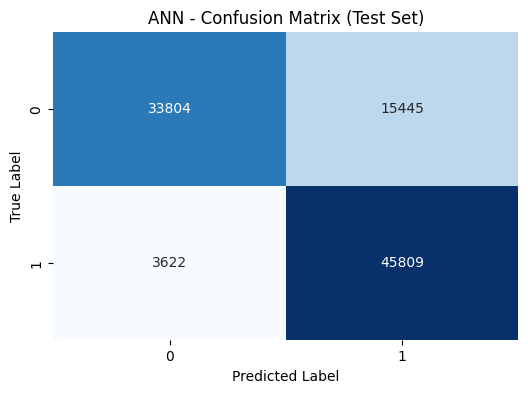

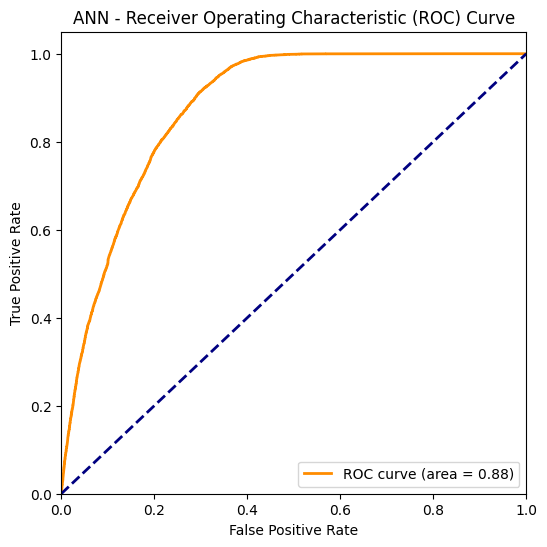

In [12]:
# Neural Network Classifier (ANN)

ANN = MLPClassifier(hidden_layer_sizes=64, max_iter=700 , random_state=42)
ANN.fit(X_train, y_train)

y_pred_tr = ANN.predict(X_train)
y_pred_te = ANN.predict(X_test)

ANN_results = evaluate_model(ANN, X_train, y_train, X_test, y_test, 'ANN')

all_results.append(ANN_results)

--- RandomForest Test Metrics ---
Accuracy: 0.9282
Precision: 0.9002
Recall (Sensitivity): 0.9635
F1-Score: 0.9308
ROC AUC: 0.9785


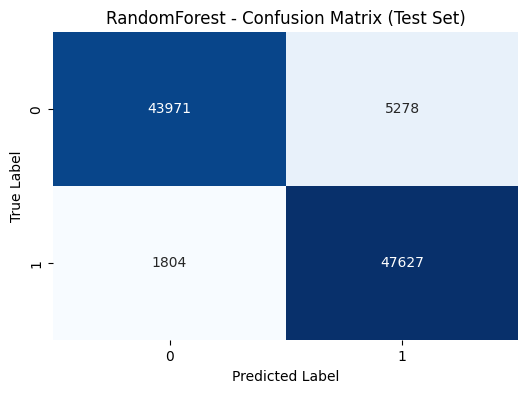

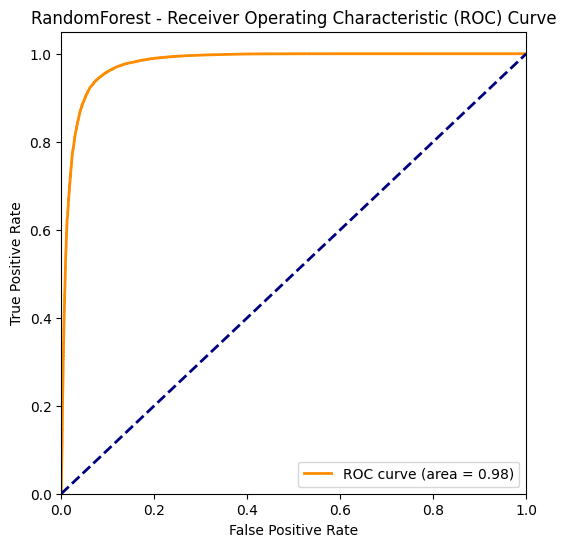

In [13]:
# Random Forest

rf = RandomForestClassifier(max_depth=64 , min_samples_split=16 , min_samples_leaf=4)
rf.fit(X_train, y_train)

y_pred_tr = rf.predict(X_train)
y_pred_te = rf.predict(X_test)

rf_results = evaluate_model(rf, X_train, y_train, X_test, y_test, 'RandomForest')

all_results.append(rf_results)

--- Logistic Regression Test Metrics ---
Accuracy: 0.7745
Precision: 0.7034
Recall (Sensitivity): 0.9508
F1-Score: 0.8086
ROC AUC: 0.7816


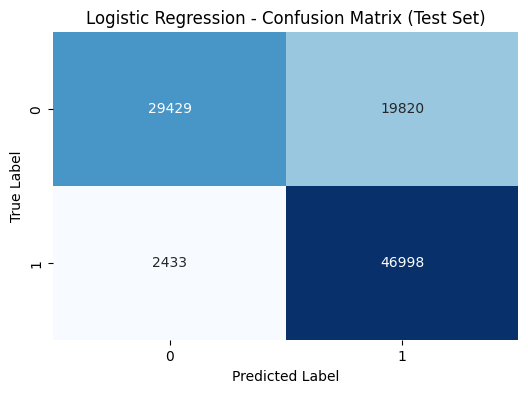

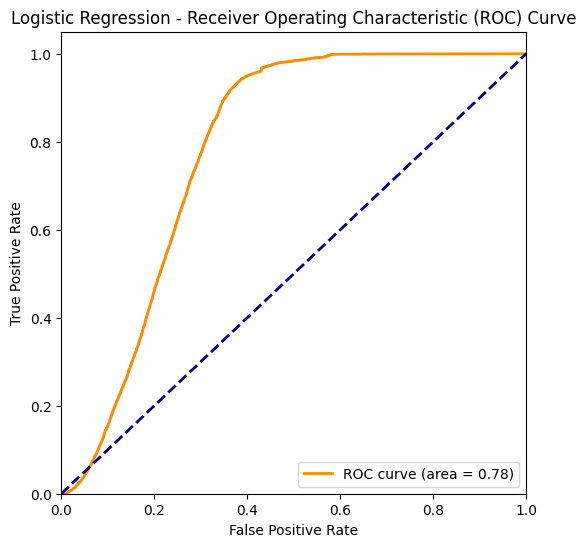

In [14]:
# Logistic Regression

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_te = lr.predict(X_test)

lr_results = evaluate_model(lr, X_train, y_train, X_test, y_test, 'Logistic Regression')

all_results.append(lr_results)

--- XGBoost Test Metrics ---
Accuracy: 0.9482
Precision: 0.9383
Recall (Sensitivity): 0.9597
F1-Score: 0.9489
ROC AUC: 0.9847


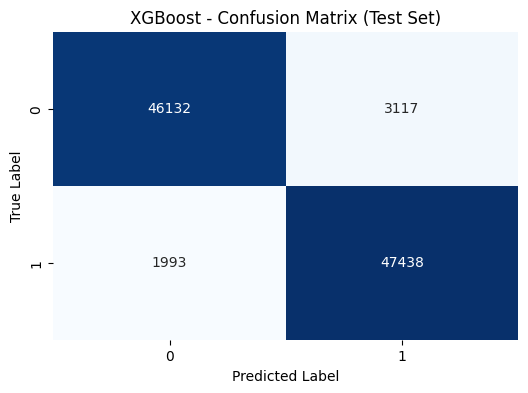

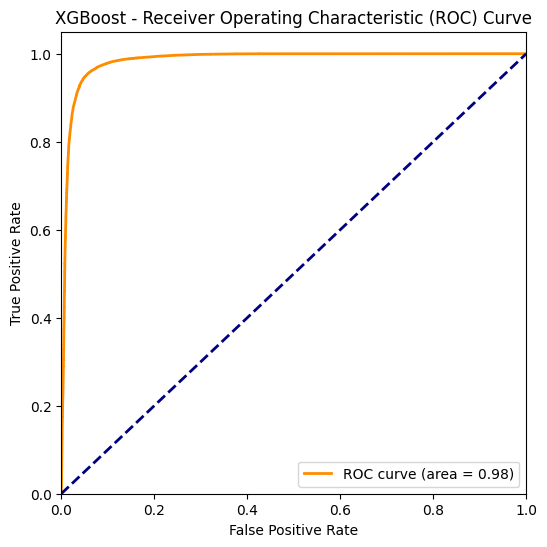

In [15]:
# XGBoost

xgb = Xgb.XGBClassifier(max_depth=16, n_estimators=1000, learning_rate=0.1)
xgb.fit(X_train, y_train)

y_pred_tr = xgb.predict(X_train)
y_pred_te = xgb.predict(X_test)

xgb_results = evaluate_model(xgb, X_train, y_train, X_test, y_test, 'XGBoost')

all_results.append(xgb_results)

In [16]:
results_df = pd.DataFrame(all_results)
results_df = results_df.drop_duplicates(subset=['Model'], keep='last')
print(results_df.sort_values(by='ROC AUC', ascending=False))

                 Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
3              XGBoost  0.948216   0.938344  0.959681  0.948893  0.984730
1         RandomForest  0.928233   0.900236  0.963505  0.930797  0.978491
0                  ANN  0.806779   0.747853  0.926726  0.827736  0.878030
2  Logistic Regression  0.774493   0.703373  0.950780  0.808575  0.781552


--- RandomForest Feature Importances ---
SEX       0.317250
AGE       0.244304
TOTEXP    0.223044
TOTSLF    0.171581
POVCAT    0.035273
INSAT     0.008547
dtype: float64


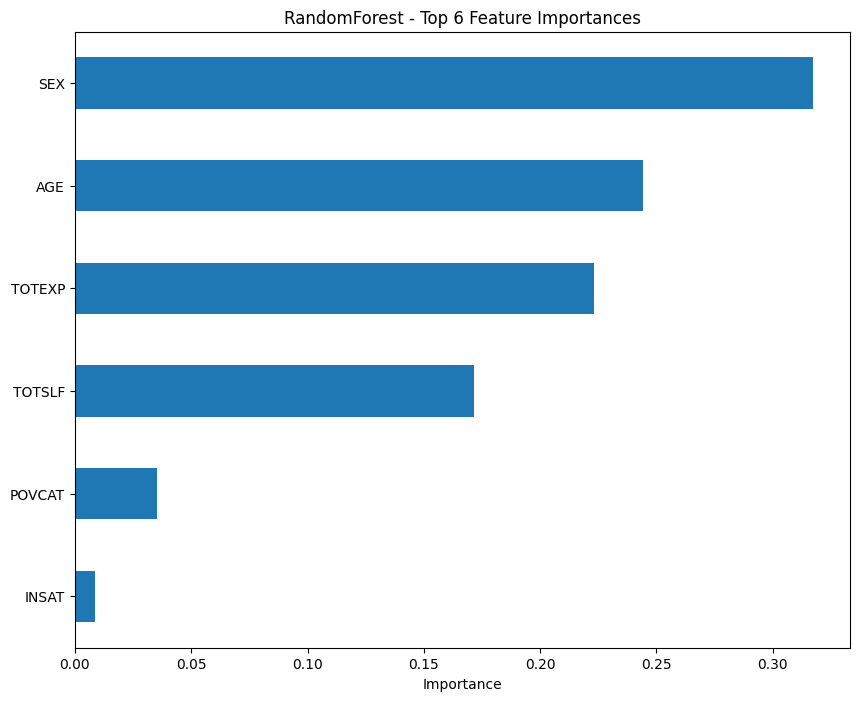

\--- XGBoost Feature Importances ---
SEX       0.978077
INSAT     0.012335
AGE       0.003210
POVCAT    0.002351
TOTEXP    0.002173
TOTSLF    0.001854
dtype: float32


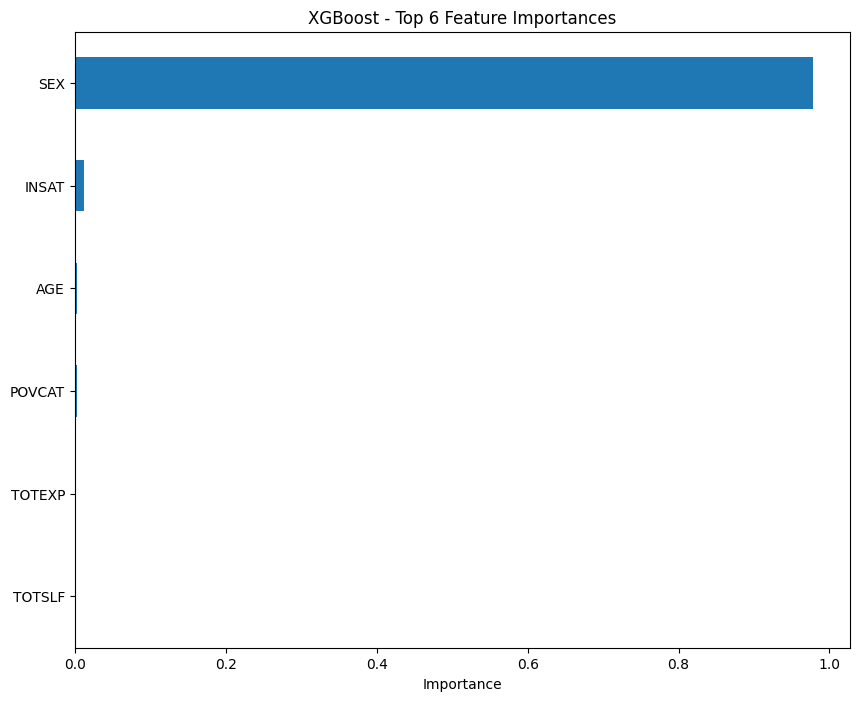

In [20]:
# Feature Importance Plotting

importances_rf = rf.feature_importances_

feature_names_rf = features  # ['AGE', 'SEX', 'INSAT', 'POVCAT', 'TOTSLF', 'TOTEXP']

forest_importances_rf = pd.Series(importances_rf, index=feature_names_rf)
sorted_importances_rf = forest_importances_rf.sort_values(ascending=False)

print("--- RandomForest Feature Importances ---")
print(sorted_importances_rf.head(6))

plt.figure(figsize=(10, 8))
sorted_importances_rf.head(15).plot(kind='barh')
plt.title("RandomForest - Top 6 Feature Importances")
plt.xlabel("Importance")
plt.gca().invert_yaxis() 
plt.show()

importances_xgb = xgb.feature_importances_
feature_names_xgb = features  # ['AGE', 'SEX', 'INSAT', 'POVCAT', 'TOTSLF', 'TOTEXP']

forest_importances_xgb = pd.Series(importances_xgb, index=feature_names_xgb)
sorted_importances_xgb = forest_importances_xgb.sort_values(ascending=False)

print("\\--- XGBoost Feature Importances ---")
print(sorted_importances_xgb.head(6))

plt.figure(figsize=(10, 8))
sorted_importances_xgb.head(6).plot(kind='barh')
plt.title("XGBoost - Top 6 Feature Importances")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()